<a href="https://colab.research.google.com/github/manojgupta3051994/dsmp-pre-work/blob/master/Tensorflow_tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [3]:
 import tensorflow as tf
 print (tf.version)

<module 'tensorflow_core._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow_core/_api/v2/version/__init__.py'>


In [0]:
string = tf.Variable("this is a string",tf.string)
number = tf.Variable(324,tf.int16)
floating = tf.Variable(3.567,tf.float64)

In [5]:
print (string)
print (number)
print (floating)

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'this is a string'>
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=324>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.567>


In [0]:
rank1_tensor = tf.Variable(['Manoj','Gupta'],tf.string)
rank2_tensor = tf.Variable([['Manoj','Gupta','ok'],['High','School','ok'],['ok','ok','k']],tf.string)

In [21]:
tf.rank(rank1_tensor)


<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [22]:
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [23]:
tf.rank(string)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [24]:
rank1_tensor.shape

TensorShape([2])

In [25]:
rank2_tensor.shape

TensorShape([3, 3])

In [26]:
string.shape

TensorShape([])

In [0]:
tensor1 = tf.ones([1,2,3])
tensor2 = tf.reshape(tensor1,[2,3,1])
tensor3 = tf.reshape(tensor2,[3,-1])

In [29]:
print (tensor1)
print (tensor2)
print (tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [0]:
!pip install -q sklearn

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

In [0]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [0]:
Categorical_Columns = ['sex', 'n_siblings_spouses','parch','class','deck','embark_town','alone']
Numerical_Columns =['age','fare']

In [41]:
feature_columns = []
for feature_name in Categorical_Columns:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

for feature_name in Numerical_Columns:
  feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))


print (feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [0]:
def make_input_fn(data_df,label_df,num_epochs=10,shuffle=True,batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
    if shuffle:
      df = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function
  


In [0]:
train_input_fn = make_input_fn(dftrain,y_train)
eval_input_fn = make_input_fn(dfeval,y_eval, num_epochs=1,shuffle=False)

In [0]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

In [74]:
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)
clear_output()
print (result['accuracy'])

0.7651515


In [77]:
result = list(linear_est.predict(eval_input_fn))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_07bicac/model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [87]:
print (dfeval.loc[4])
print (y_eval.loc[4])
print (result[4]['probabilities'][1])

sex                          male
age                            34
n_siblings_spouses              0
parch                           0
fare                           13
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object
1
0.18772201


In [0]:
CSV_COLUMN_NAMES = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
SPECIES = ['Setosa','Versicolor','Virginica']
 

In [0]:
train_path = tf.keras.utils.get_file('iris_training.csv','https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv')
test_path = tf.keras.utils.get_file('iris_test.csv','https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv')

train = pd.read_csv(train_path, names= CSV_COLUMN_NAMES,header=0)
test = pd.read_csv(test_path, names = CSV_COLUMN_NAMES, header =0)

In [91]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [92]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [0]:
def input_fn(features,labels,batch_size=256,training=True):
  dataset = tf.data.Dataset.from_tensor_slices((dict(features),labels))
  if training:
    dataset = dataset.shuffle(1000).repeat()
  return dataset.batch(batch_size)


In [96]:
my_feature_columns=[]
for key in train.keys():
  my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print (my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [97]:
classifier = tf.estimator.DNNClassifier(feature_columns=my_feature_columns,hidden_units=[30,10],n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpfiz0bce8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
classifier.train(input_fn = lambda:input_fn(train,train_y,training=True),steps=5000)

In [102]:
eval_result = classifier.evaluate(input_fn = lambda:input_fn(test,test_y,training = False))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-22T09:42:18Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpfiz0bce8/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.25826s
INFO:tensorflow:Finished evaluation at 2020-03-22-09:42:18
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.8666667, average

In [107]:
def input_fn(features,batch_size = 256):
  return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength','SepalWidth','PetalLength','PetalWidth']
predict = {}

print ("Type numeric values for prediction")

for feature in features:
  valid = True
  while valid:
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn = lambda:input_fn(predict))
for pred_dict in predictions:
  class_id = pred_dict['class_ids'][0]
  probability = pred_dict['probabilities'][class_id]

print ('Prediction is "{}" ({:.1f}%)'.format(SPECIES[class_id],100*probability))

Type numeric values for prediction
SepalLength: 2.6
SepalWidth: 2.3
PetalLength: 6.5
PetalWidth: 6.3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpfiz0bce8/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Virginica" (100.0%)


In [0]:
import tensorflow_probability as tfp

In [0]:
tfd = tfp.distributions
initial_distributions = tfd.Categorical(probs=[0.8,0.2])
transition_distribution = tfd.Categorical(probs = [[0.7,0.3],[0.2,0.8]])
observation_distribution = tfd.Normal(loc=[0.,15.],scale=[5.,10.])

In [0]:
model = tfd.HiddenMarkovModel(initial_distribution= initial_distributions,transition_distribution=transition_distribution,observation_distribution=observation_distribution,num_steps=7)

In [0]:
mean = model.mean()

In [114]:
with tf.compat.v1.Session() as sess:
  print (mean.numpy())

[2.9999998 5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]


In [0]:
from tensorflow import keras

In [116]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [117]:
train_images.shape

(60000, 28, 28)

In [0]:
train_images[0,23,23]

In [120]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [0]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

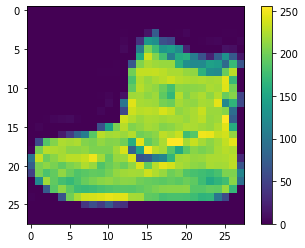

In [123]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images/255
test_images = test_images/255

In [0]:
model =  keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(128,activation='relu'),keras.layers.Dense(10,activation='softmax')])

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [133]:
model.fit(train_images,train_labels,epochs=1)

Train on 60000 samples
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1845 - accuracy: 0.9303


In [134]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=1)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3604 - accuracy: 0.8872


In [0]:
predictions = model.predict(test_images)

Trouser


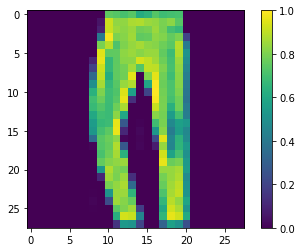

In [147]:
print (class_names[np.argmax(predictions[5])])
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(False)
plt.show()